CHƯƠNG 1. PHÂN NHÓM ML

1. Dựa trên phương thức học
1.1.	Supervised learning
-	Là thuật toán dự đoán outcome của new input dựa trên các cặp (data,label) đã biết từ trước. Các cặp dữ liệu biết trước X x Y là tập training data.
-	SL được chia thành 2 loại:
+ Classification: input của data được chia thành hữu hạn nhóm, VD xác định 1 email có phải spam không
+ Regression: label không được chia thành nhóm mà là giá trị thực cụ thể, VD 1 căn nhà rộng x m2, y phòng ngủ thì có giá bao nhiêu
1.2. Unsupervised learning
-	Trong thuật toán này, chỉ có dữ liệu đầu vào mà không biết outcome hay label, dựa vào cấu trúc của dữ liệu để thực hiện công việc nào đó
-	UL được chia thành 2 loại:
+ Clustering: Chia dữ liệu thành các nhóm nhỏ dựa vào sự liên quan giữa các dự liệu trong nhóm
+ Association: Khám phá ra 1 quy luật dựa trên nhiều dữ liệu cho trước
1.3.	Semi-Supersived learning
-	Dữ liệu lớn được gán nhãn một phần

1.4.	Reinforcement learning

-	Giúp hệ thống tự xác định hành vi sao cho đạt được lợi ích cao nhất. Chủ yếu được áp dụng vào lý thuyết trò chơi
2. Dựa trên chức năng


CHƯƠNG 2. LINEAR REGRESSION
1. Dạng của linear regression
- Ví dụ một căn nhà rộng x1 m2, có x2 phòng ngủ và cách trung tâm thành phố x3 km có giá bao nhiêu.
- Đặt: 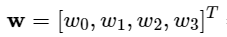 là vector cột chứa hệ số cần phải tối ưu và  là vector hàng chứa dữ liệu đầu vào. Ta có dạng của LR: 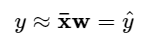
2. Sai số dự đoán
- Ta mong muốn sự chênh lệch giữa giá trị thực y và giá trị dự đoán y hat là nhỏ nhất, tức là ta mong muốn giá trị sau càng nhỏ càng tốt 
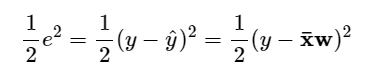
3. Loss funtion
- Hàm mất mát: 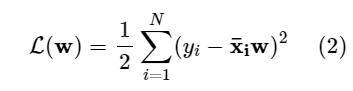
- Giá trị w làm cho loss function đạt GTNN gọi là điểm tối ưu: 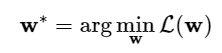
4. Nghiệm của Linear regression
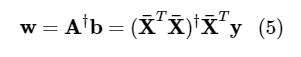
Trong đó A† là giả nghịch đảo


# VÍ DỤ

Dự đoán cân nặng của 1 người dựa theo chiều cao của họ.

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
import re

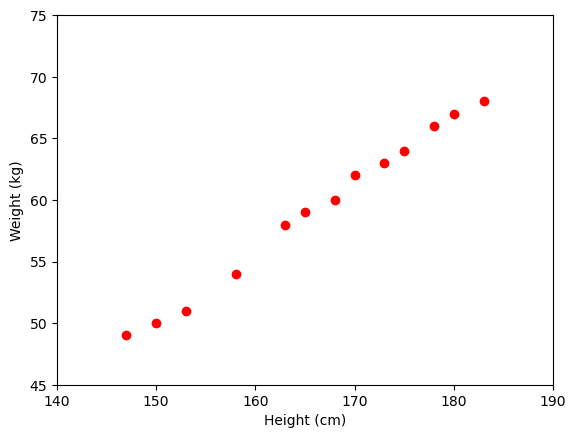

In [3]:
# Khai báo và biểu diễn dữ liệu trên đồ thị
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Nhận xét: Dữ liệu sắp xếp gần như 1 đường thẳng, nên mô hình linear regression nhiều khả năng sẽ cho kết quả tốt
weight = w1 x height + w0 

Giả nghịch đảo của ma trận A được tính bằng np.linalg.pinv(A) 

Tính theo công thức (5)

In [4]:
# Building Xbar 
one = np.ones((X.shape[0], 1)) 
#tạo mảng 1 chiều với X.shape[0] hàng và 1 cột, các phần tử có giá trị bằng 1
Xbar = np.concatenate((one, X), axis = 1)
# nối cột tương ứng của 2 mảng 2 chiều axis = 1, nối mảng a và mảng b axis = 0 


# Caculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
# nhân ma trận
B = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A),B)
w

array([[-33.73541021],
       [  0.55920496]])

In [5]:
w0 = w[0][0]
w1 = w[1][0]
y1 = w0 + 200*w1
print( u'predict weight of person with height 200cm: %.2f (kg)' %(y1))

predict weight of person with height 200cm: 78.11 (kg)


Tìm w với thư viện scikit-learn

In [6]:
# tạo mô hình linear regression không bị chặn
regr = linear_model.LinearRegression(fit_intercept = 0)
# điều chỉnh mô hình cho phù hợp với dữ liệu
regr.fit(Xbar, y)
# in ra hệ số w
regr.coef_

array([[-33.73541021,   0.55920496]])

In [7]:
# đưa ra dự đoán với người có chiều cao 200cm
regr.predict([[1,200]])

array([[78.10558218]])

# assignment

Đưa ra dự đoán giá nhà dựa trên dữ liệu diện tích, số phòng ngủ và số tầng

In [8]:
house = pd.read_csv("C:\AI\VN_housing_dataset.csv")
house

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82492,82492.0,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82493,82493.0,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"
82494,82494.0,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,NaN,NaN,"101,67 triệu/m²"
82495,82495.0,2019-08-05,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",Quận Cầu Giấy,Phường Mai Dịch,Nhà phố liền kề,NaN,NaN,4 phòng,45 m²,NaN,NaN,"102,22 triệu/m²"


In [9]:
house.loc[0]

Unnamed: 0                                                       0.0
Ngày                                                      2020-08-05
Địa chỉ            Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...
Quận                                                   Quận Cầu Giấy
Huyện                                                Phường Nghĩa Đô
Loại hình nhà ở                                         Nhà ngõ, hẻm
Giấy tờ pháp lý                                             Đã có sổ
Số tầng                                                            4
Số phòng ngủ                                                 5 phòng
Diện tích                                                      46 m²
Dài                                                              NaN
Rộng                                                             NaN
Giá/m2                                                86,96 triệu/m²
Name: 0, dtype: object

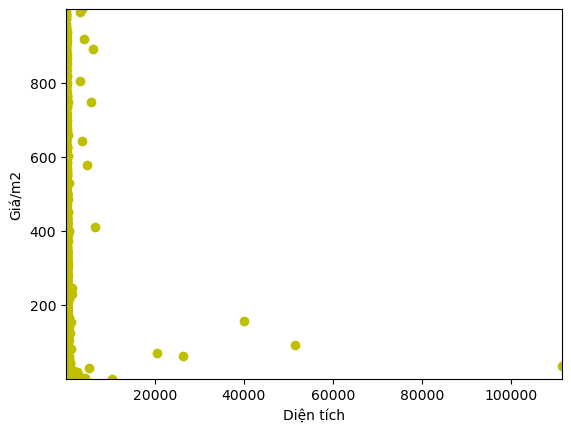

In [10]:
# Tính theo dữ liệu diện tích
# Tính theo công thức (5)


# diện tích
dt = []
for i in house['Diện tích']: # tách số
    m = re.findall(r'\d+', str(i))
    if len(m) > 1:
        a = m[0] + '.' + m[1]
    elif len(m) == 1:
        a = m[0]
    dt.append(float(a))
dt = np.array([dt]).T
# dt

# giá (thiếu TH e^)
price = []
for i in house['Giá/m2']: # tách số
    m = (re.findall(r'\d+', str(i)))
    if len(m) > 1:
        a = m[0] + '.' + m[1]
    elif len(m) == 1:
        a = m[0]
    price.append(float(a))
    
price = np.array([price]).T
# price

a = dt.min()
b = dt.max()
c = price.min()
d = price.max()

plt.plot(dt, price, 'yo')
plt.axis([a, b, c, d])
plt.xlabel('Diện tích')
plt.ylabel('Giá/m2')
plt.show()

In [11]:
# xác định Xbar
one_ = np.ones((dt.shape[0],1))
dtBar = np.concatenate((one_,dt), axis = 1)
x = np.dot(dtBar.T, dtBar)
y = np.dot(dtBar.T, price)
w = np.dot(np.linalg.pinv(x),y)
y_ = w[0][0] +60*w[1][0]
w

array([[1.02837124e+02],
       [1.76225612e-03]])

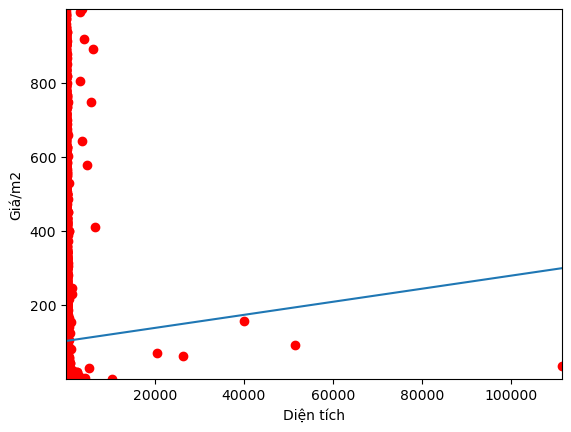

In [12]:
x0 = np.linspace(a,b,2)
y0 = w[0][0] + w[1][0]*x0

plt.plot(dt, price, 'ro')
plt.plot(x0, y0)
plt.axis([a, b, c, d])
plt.xlabel('Diện tích')
plt.ylabel('Giá/m2')
plt.show()

In [13]:
#  Tính bằng scikit-learn
regr = linear_model.LinearRegression(fit_intercept=0)
regr.fit(dtBar, price)
regr.coef_

array([[1.02837124e+02, 1.76225612e-03]])

In [14]:
# tính theo dữ liệu số phòng ngủ
# cham = house['Số phòng ngủ']
cham = []
for i in house['Số phòng ngủ']: # tách số
    m = (re.findall(r'\d+', str(i)))
    if len(m):
        a = m[0]
    cham.append(int(a))
    
cham = np.array([cham]).T
cham

array([[5],
       [3],
       [4],
       ...,
       [4],
       [4],
       [4]])

In [19]:
# Xác định Xbar
one = np.ones((cham.shape[0],1))
chamBar = np.concatenate((one, cham), axis = 1)

# xác định w
w = np.dot(np.linalg.pinv(np.dot(chamBar.T, chamBar)),np.dot(chamBar.T, price))
w

array([[61.64737523],
       [10.66260702]])

In [22]:
regr = linear_model.LinearRegression(fit_intercept = 0)
regr.fit(chamBar, price)
regr.coef_

array([[61.64737523, 10.66260702]])

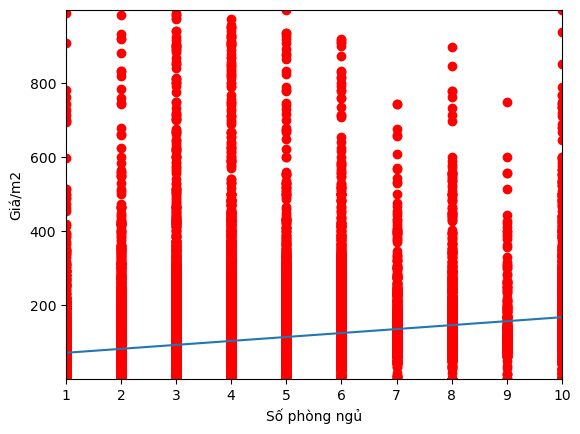

In [24]:
# biểu đồ
a = cham.min()
b = cham.max()
x0 = np.linspace(a,b,2)
y0 = w[0][0] + w[1][0]*x0
plt.plot(cham, price, 'ro')
plt.axis([a,b,c,d])
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá/m2')
plt.plot(x0,y0)
plt.show()

In [78]:
fl = []
for i in house['Số tầng']:
    m = (re.findall(r'\d+', str(i)))
    if len(m):
        a = m[0]
    fl.append(int(a))
fl = np.array([fl]).T
fl

array([[4],
       [4],
       [4],
       ...,
       [5],
       [5],
       [5]])

In [79]:
# tính theo số phòng ngủ, diện tích

# Xác định Xbar
X = np.concatenate((cham, dt,fl), axis = 1)
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one,X), axis = 1)

# xác định w
regr = linear_model.LinearRegression(fit_intercept=0)
regr.fit(Xbar, price)
regr.coef_
X

array([[ 5., 46.,  4.],
       [ 3., 37.,  4.],
       [ 4., 40.,  4.],
       ...,
       [ 4., 60.,  5.],
       [ 4., 45.,  5.],
       [ 4., 45.,  5.]])

In [81]:
regr.predict([[1,5,46,8]])

array([[121.75452144]])

In [71]:
a = [[1,2,3],[4,5,6]]
b = [[7,8],[9,10]]
c = [[11,12],[13,None]]
np.concatenate((a,b,c), axis=1)

array([[1, 2, 3, 7, 8, 11, 12],
       [4, 5, 6, 9, 10, 13, None]], dtype=object)

In [85]:
house['Giấy tờ pháp lý'].value_counts()

Đã có sổ        52914
Đang chờ sổ       356
Giấy tờ khác      340
Name: Giấy tờ pháp lý, dtype: int64

NameError: name 'house' is not defined